In [1]:
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
from persist import cache_to_file

![image_to_solve](https://i.ytimg.com/vi/E4F2tdW7jZc/hq720.jpg?sqp=-oaymwEhCK4FEIIDSFryq4qpAxMIARUAAAAAGAElAADIQj0AgKJD&rs=AOn4CLB5njj9sKf3BguJa9Vd8gw0asQ1zA)

[Link, Click here](https://www.youtube.com/watch?v=E4F2tdW7jZc)

In [2]:
L_x = 18  # Length of the domain in meters
L_y = 6  # Height of the domain in meters
POINT_PER_M = 5
nx = L_x*POINT_PER_M  # Number of points in x-direction
ny = L_y*POINT_PER_M  # Number of points in y-direction
dx = L_x / nx #why nx-1
dy = L_y / ny #this is right since it is = 1/POINT_PER_M
#print(dx, 1/POINT_PER_M)

In [3]:
# Initialize the grid for hydraulic head (h)
  # Transmisivity grid // 1 full, 0 block flow // simplified with 1 can use fractions

In [4]:
# Sheet plate at x = 2.5 (middle of the sandbox)
sheet_x_index = nx // 2  # The x position of the sheet
sheet_y_index = ny // 2 

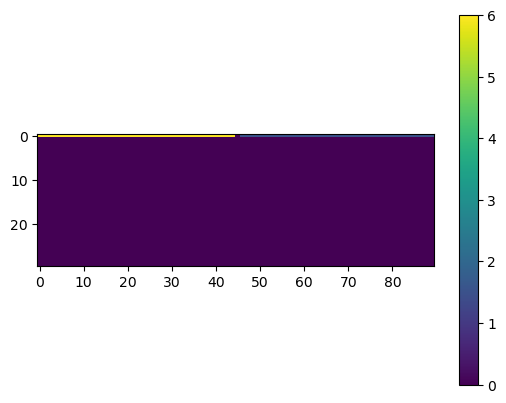

In [5]:
head1 = 6
head2 = 1.5
h = np.zeros((ny, nx))  # Hydraulic head grid
h[0,:sheet_x_index]=head1
h[0,sheet_x_index+1:]=head2

#h[:,0:1]=6
#h[:,-1]=1.5
plt.imshow(h)
#plt.plot(h[0,:])#show top only
plt.colorbar()
plt.show()

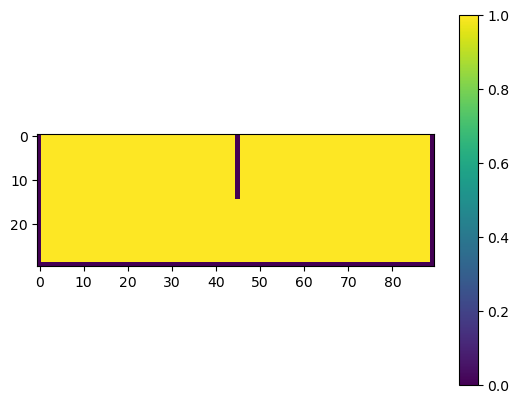

In [6]:
#place sheet
permiability = 4e-6
k = np.ones((ny, nx))#*4e-6 opt.
k[0:sheet_y_index, sheet_x_index] = 0
#impermiable bottom
k[-1,:]=0
#impermiable sides too??
k[:,0]=0
k[:,-1]=0
plt.imshow(k)
plt.colorbar()
plt.show()

In [7]:
# Iteration parameters
max_iter = 30000
tolerance = 1e-8#changed i want fast

@cache_to_file('gauss_result.npy')
def gauss():
    global h
    # Gauss-Seidel Iteration
    for it in range(max_iter):
        h_old = h.copy()  # Keep a copy of the current grid for convergence check
        for i in range(1, ny - 1):
            for j in range(1, nx - 1):
                h[i, j] = k[i + 1, j]*h_old[i + 1, j] + k[i - 1, j]*h_old[i - 1, j] + k[i , j+1]*h_old[i, j + 1] + k[i, j - 1]*h_old[i, j - 1]
                h[i, j] = h[i, j]/(k[i + 1, j]+k[i - 1, j]+k[i , j+1]+k[i, j - 1])
        # Check for convergence (absolute difference)
        if np.max(np.abs(h - h_old)) < tolerance:
            print(f"Converged after {it + 1} iterations.")
            break
    return h

#uncomment this to recalculate
#os.remove('gauss_result.npy')
h = gauss()

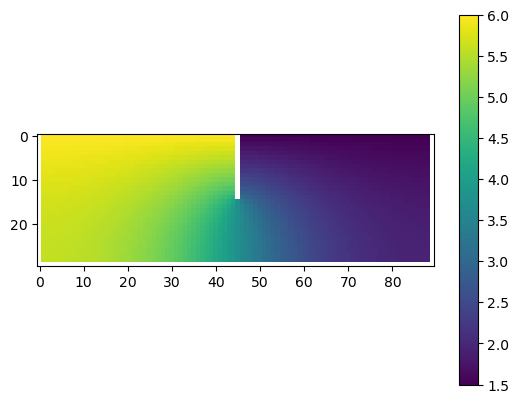

In [8]:
#convert everything to NaN
h_filtered = h.copy()
for i in range(0, ny):
    for j in range(0, nx):
        if k[i,j]==0:
            h_filtered[i,j]=None
plt.imshow(h_filtered)
plt.colorbar()
plt.show()

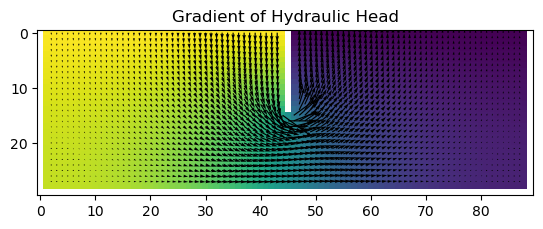

In [9]:
hx, hy = np.gradient(h_filtered, dx, dy)
hy = hy*-1
plt.imshow(h_filtered)
plt.quiver(hy, hx)
plt.title('Gradient of Hydraulic Head')
#plt.savefig("Gradient.png")
plt.show()

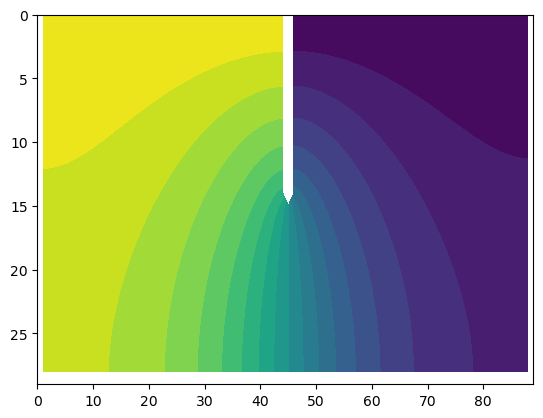

In [10]:
contour = plt.contourf(h_filtered, levels=20)
plt.gca().invert_yaxis()
#plt.savefig("Seepage.png")

In [11]:
#To calculate discharge
hxa = hx[sheet_y_index+1:-2,sheet_x_index]
hya = hy[sheet_y_index+1:-2,sheet_x_index]

In [12]:
hxas = np.sum(hxa)
hyas = np.sum(hya)

In [13]:
#q=kia
vertical_flow = permiability * hxas * dy
horizontal_flow = permiability * hyas * dx
print(f"Vertical: {vertical_flow}") #should be near 0
print(f"Horizontal: {horizontal_flow}")

Vertical: 1.8163388483154463e-09
Horizontal: 6.405728289486458e-06
